In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [32]:
pima = pd.read_csv("diabetes.csv")

In [33]:
pima.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
pima.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima['Outcome'] # Target variable

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
88,15,110,37.1,43,136,70,0.153
467,0,100,36.8,25,97,64,0.600
550,1,0,27.4,21,116,70,0.204
147,2,119,30.5,34,106,64,1.400
481,0,0,35.2,29,123,88,0.197
...,...,...,...,...,...,...,...
645,2,440,39.4,30,157,74,0.134
715,7,392,33.9,34,187,50,0.826
72,13,0,43.4,42,126,90,0.583
235,4,0,43.6,26,171,72,0.479


In [37]:
X_train.shape


(537, 7)

In [38]:
X_test


,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
285,7,135,26.0,51,136,74,0.647
101,1,0,26.1,22,151,60,0.179
581,6,0,25.0,27,109,60,0.206
352,3,0,34.4,46,61,82,0.243
726,1,180,36.1,25,116,78,0.496
...,...,...,...,...,...,...,...
241,4,88,33.1,22,91,70,0.446
599,1,120,23.1,26,109,38,0.407
650,1,100,25.2,23,91,54,0.234
11,10,0,38.0,34,168,74,0.537


In [39]:
y_test

,Outcome
285,0
101,0
581,0
352,0
726,0
...,...
241,0
599,0
650,0
11,1


In [40]:
clf = DecisionTreeClassifier()


In [41]:
clf = clf.fit(X_train,y_train)


In [42]:
y_pred = clf.predict(X_test)


In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6493506493506493


In [44]:
%pip install pydotplus


In [45]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

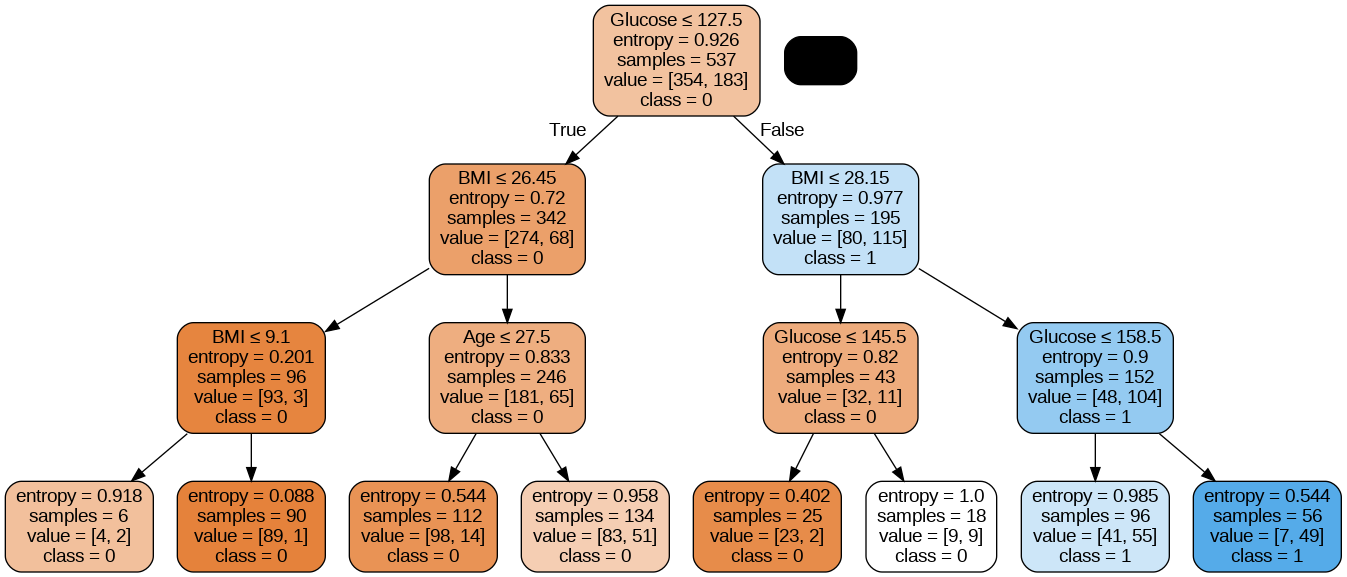

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) # Changed to max_depth=3
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [47]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.7705627705627706
Recall Score:  0.6352941176470588
Precision Score:  0.7105263157894737
F1 Score:  0.6708074534161491
Confusion Matrix: 
 [[124  22]
 [ 31  54]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



Text(95.72222222222221, 0.5, 'Actual')

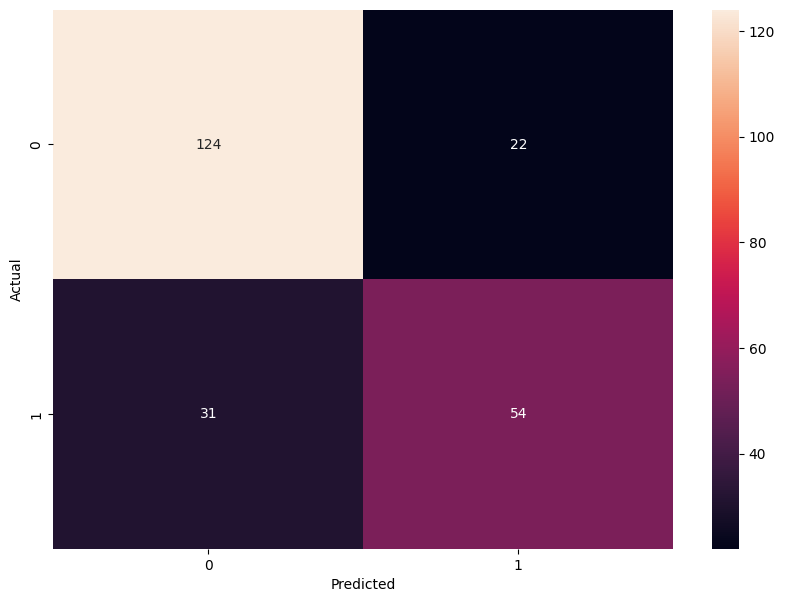

In [48]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [56]:
%pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.4/703.4 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 24.5 MB/s eta 0:00:00


In [57]:
from lazypredict.Supervised import LazyClassifier

In [58]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 183, number of negative: 354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 567
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.340782 -> initscore=-0.659811
[LightGBM] [Info] Start training from score -0.659811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [59]:
display(models)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.77,0.78,0.78,0.78,0.05
SVC,0.81,0.76,0.76,0.80,0.03
NuSVC,0.80,0.75,0.75,0.79,0.07
KNeighborsClassifier,0.78,0.75,0.75,0.78,0.03
ExtraTreesClassifier,0.78,0.74,0.74,0.77,0.29
LGBMClassifier,0.77,0.74,0.74,0.77,0.11
LogisticRegression,0.78,0.74,0.74,0.78,0.10
LinearSVC,0.78,0.74,0.74,0.78,0.05
LinearDiscriminantAnalysis,0.78,0.74,0.74,0.78,0.05


In [60]:
display(models)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.77,0.78,0.78,0.78,0.05
SVC,0.81,0.76,0.76,0.80,0.03
NuSVC,0.80,0.75,0.75,0.79,0.07
KNeighborsClassifier,0.78,0.75,0.75,0.78,0.03
ExtraTreesClassifier,0.78,0.74,0.74,0.77,0.29
LGBMClassifier,0.77,0.74,0.74,0.77,0.11
LogisticRegression,0.78,0.74,0.74,0.78,0.10
LinearSVC,0.78,0.74,0.74,0.78,0.05
LinearDiscriminantAnalysis,0.78,0.74,0.74,0.78,0.05
